# Proyecto No.1 Econometría - Jonathan Corado - 18001211 , Luis Calderón - 18002632 

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as scikit_learn

# Carga/Slicing de datos

In [2]:
dataset = np.load('proyecto_training_data.npy')
trainData = dataset[0:int(len(dataset)*0.8)]
testData = dataset[int(len(dataset)*0.8):len(dataset)]

dataframe = pd.DataFrame(dataset, columns = ['SalePrice','OverallQual','1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
trainDataFrame = pd.DataFrame(trainData, columns = ['SalePrice','OverallQual','1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
testDataFrame = pd.DataFrame(testData, columns = ['SalePrice','OverallQual','1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])

display(dataframe)

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [3]:
cols_na = [col for col in dataframe if dataframe[col].isnull().mean()]
for col in cols_na:
  print(f'''{col}-{dataframe[col].isnull().mean()}''')
print(f'''\n{cols_na}\n''')
print(dataframe[cols_na].dtypes)

LotFrontage-0.1773972602739726

['LotFrontage']

LotFrontage    float64
dtype: object


In [4]:
dataframe['LotFrontageMean'] = np.round(dataframe['LotFrontage'].fillna(dataframe['LotFrontage'].mean()))
dataframe['LotFrontageMedian'] = np.round(dataframe['LotFrontage'].fillna(dataframe['LotFrontage'].median()))


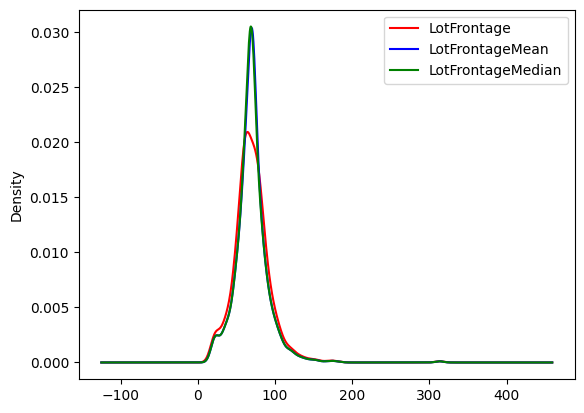

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataframe['LotFrontage'].plot.density(color='red', label='LotFrontage')
dataframe['LotFrontageMean'].plot.density(color='blue', label='LotFrontageMean')
dataframe['LotFrontageMedian'].plot.density(color='green', label='LotFrontageMedian')
ax.legend()
plt.show()

In [6]:
dataframe['LotFrontage'] = np.round(dataframe['LotFrontage'].fillna(dataframe['LotFrontage'].mean()))

# Analisis Exploratorio por Variable


#### Sale Price

In [7]:
print(f'''Media: {dataframe['SalePrice'].mean()}''')
print(f'''Valor Maximo: {dataframe['SalePrice'].max()}''')
print(f'''Valor Minimo: {dataframe['SalePrice'].min()}''')
print(f'''Rango: {dataframe['SalePrice'].max() - dataframe['SalePrice'].min()}''')
print(f'''Desviacion Estandar: {dataframe['SalePrice'].std()}''')

Media: 180921.19589041095
Valor Maximo: 755000.0
Valor Minimo: 34900.0
Rango: 720100.0
Desviacion Estandar: 79442.50288288662


#### Overall Quality

In [8]:
print(f'''Media: {dataframe['OverallQual'].mean()}''')
print(f'''Valor Maximo: {dataframe['OverallQual'].max()}''')
print(f'''Valor Minimo: {dataframe['OverallQual'].min()}''')
print(f'''Rango: {dataframe['OverallQual'].max() - dataframe['OverallQual'].min()}''')
print(f'''Desviacion Estandar: {dataframe['OverallQual'].std()}''')

Media: 6.0993150684931505
Valor Maximo: 10.0
Valor Minimo: 1.0
Rango: 9.0
Desviacion Estandar: 1.3829965467415934


#### First Floor square feet

In [9]:
print(f'''Media: {dataframe['1stFlrSF'].mean()}''')
print(f'''Valor Maximo: {dataframe['1stFlrSF'].max()}''')
print(f'''Valor Minimo: {dataframe['1stFlrSF'].min()}''')
print(f'''Rango: {dataframe['1stFlrSF'].max() - dataframe['1stFlrSF'].min()}''')
print(f'''Desviacion Estandar: {dataframe['1stFlrSF'].std()}''')

Media: 1162.626712328767
Valor Maximo: 4692.0
Valor Minimo: 334.0
Rango: 4358.0
Desviacion Estandar: 386.5877380410744


#### Total rooms above grade

In [10]:
print(f'''Media: {dataframe['TotRmsAbvGrd'].mean()}''')
print(f'''Valor Maximo: {dataframe['TotRmsAbvGrd'].max()}''')
print(f'''Valor Minimo: {dataframe['TotRmsAbvGrd'].min()}''')
print(f'''Rango: {dataframe['TotRmsAbvGrd'].max() - dataframe['TotRmsAbvGrd'].min()}''')
print(f'''Desviacion Estandar: {dataframe['TotRmsAbvGrd'].std()}''')

Media: 6.517808219178082
Valor Maximo: 14.0
Valor Minimo: 2.0
Rango: 12.0
Desviacion Estandar: 1.6253932905840505


#### Year Built

In [11]:
print(f'''Media: {dataframe['YearBuilt'].mean()}''')
print(f'''Valor Maximo: {dataframe['YearBuilt'].max()}''')
print(f'''Valor Minimo: {dataframe['YearBuilt'].min()}''')
print(f'''Rango: {dataframe['YearBuilt'].max() - dataframe['YearBuilt'].min()}''')
print(f'''Desviacion Estandar: {dataframe['YearBuilt'].std()}''')

Media: 1971.267808219178
Valor Maximo: 2010.0
Valor Minimo: 1872.0
Rango: 138.0
Desviacion Estandar: 30.202904042525258


#### Lot Frontage

In [12]:
print(f'''Media: {dataframe['LotFrontage'].mean()}''')
print(f'''Valor Maximo: {dataframe['LotFrontage'].max()}''')
print(f'''Valor Minimo: {dataframe['LotFrontage'].min()}''')
print(f'''Rango: {dataframe['LotFrontage'].max() - dataframe['LotFrontage'].min()}''')
print(f'''Desviacion Estandar: {dataframe['LotFrontage'].std()}''')

Media: 70.04109589041096
Valor Maximo: 313.0
Valor Minimo: 21.0
Rango: 292.0
Desviacion Estandar: 22.024030962875948


# Histograma por variable

<Axes: xlabel='SalePrice', ylabel='Count'>

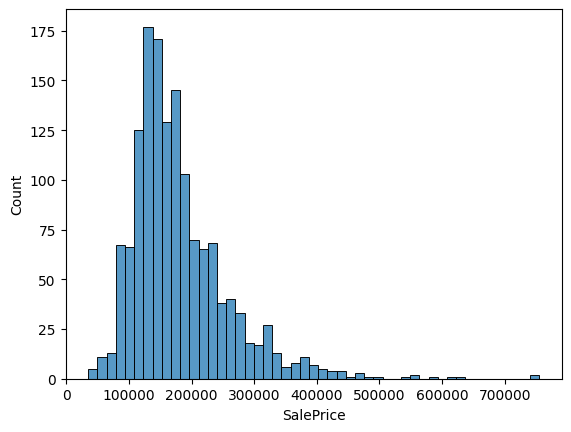

In [13]:
sns.histplot(dataframe['SalePrice'])

<Axes: xlabel='OverallQual', ylabel='Count'>

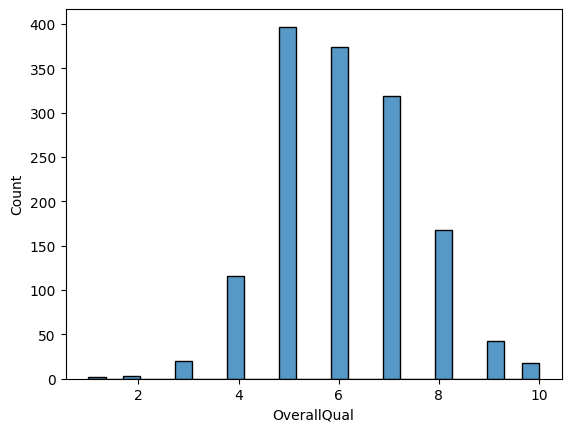

In [14]:
sns.histplot(dataframe['OverallQual'])

<Axes: xlabel='1stFlrSF', ylabel='Count'>

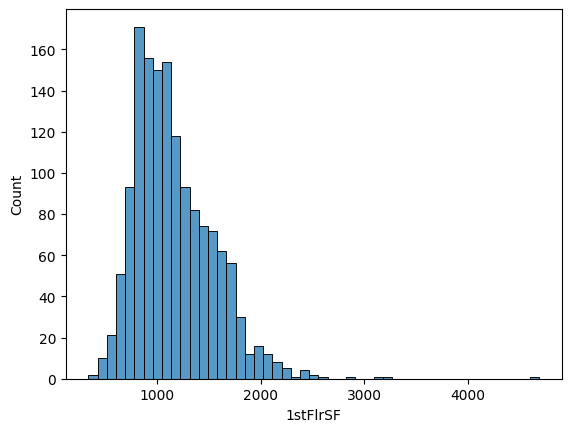

In [15]:
sns.histplot(dataframe['1stFlrSF'])

<Axes: xlabel='TotRmsAbvGrd', ylabel='Count'>

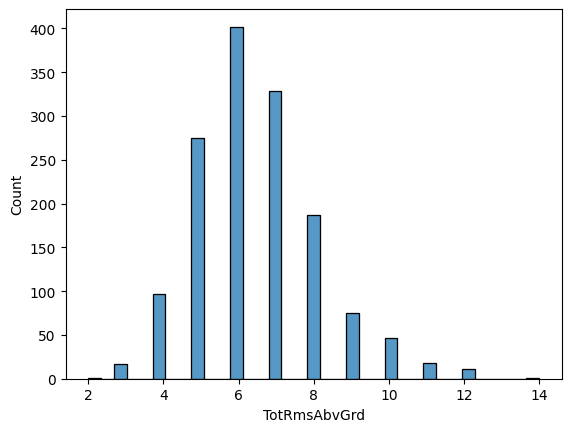

In [16]:
sns.histplot(dataframe['TotRmsAbvGrd'])

<Axes: xlabel='YearBuilt', ylabel='Count'>

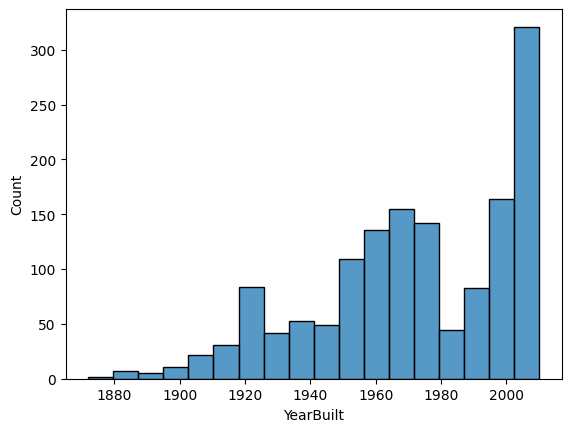

In [17]:
sns.histplot(dataframe['YearBuilt'])

<Axes: xlabel='LotFrontage', ylabel='Count'>

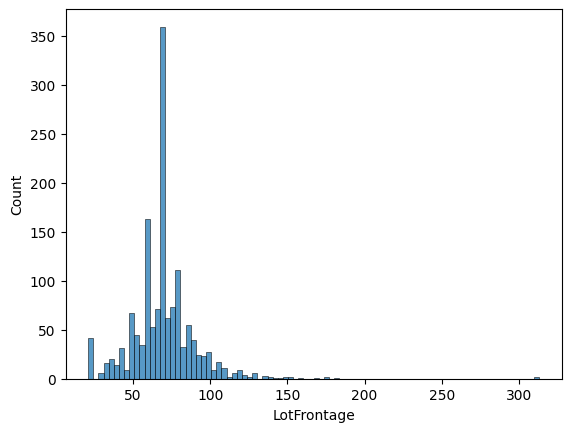

In [18]:
sns.histplot(dataframe['LotFrontage'])

# Correlacion

## Coeficiente de correlación

In [19]:
corrs = np.array([])
titles = []
for col in dataframe:
    if not (col == 'SalePrice'):
        corr = np.corrcoef(dataframe['SalePrice'], dataframe[col])
        corrs = np.append(corrs, corr[0 , 1])
        titles.append(col)
        print(f'Coeficiente de correlación entre SalePrice y {col}: \n {corr[0 , 1]} ')

coeficientes = pd.DataFrame(corrs.reshape(1,7), columns = titles)
coeficientes


Coeficiente de correlación entre SalePrice y OverallQual: 
 0.7909816005838047 
Coeficiente de correlación entre SalePrice y 1stFlrSF: 
 0.6058521846919145 
Coeficiente de correlación entre SalePrice y TotRmsAbvGrd: 
 0.5337231555820283 
Coeficiente de correlación entre SalePrice y YearBuilt: 
 0.5228973328794968 
Coeficiente de correlación entre SalePrice y LotFrontage: 
 0.3348971832698148 
Coeficiente de correlación entre SalePrice y LotFrontageMean: 
 0.3348971832698148 
Coeficiente de correlación entre SalePrice y LotFrontageMedian: 
 0.33477085313975996 


,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage,LotFrontageMean,LotFrontageMedian
0,0.790982,0.605852,0.533723,0.522897,0.334897,0.334897,0.334771


## Gráfico x vs y (scatterplot)

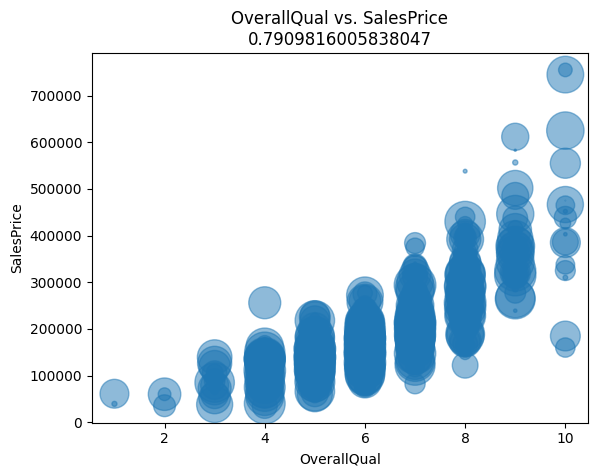

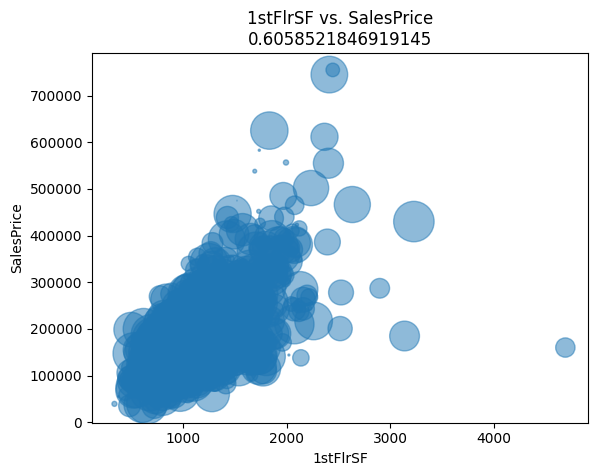

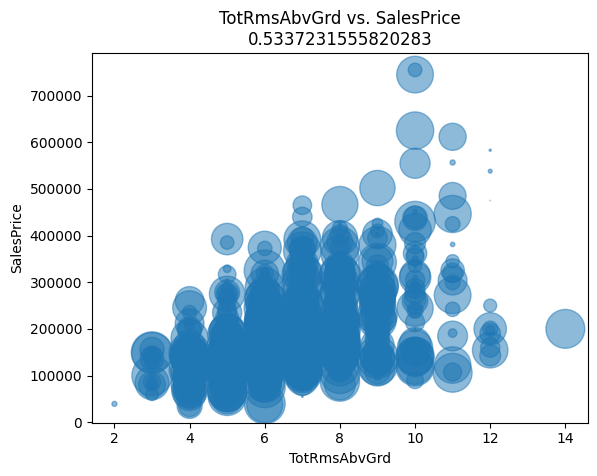

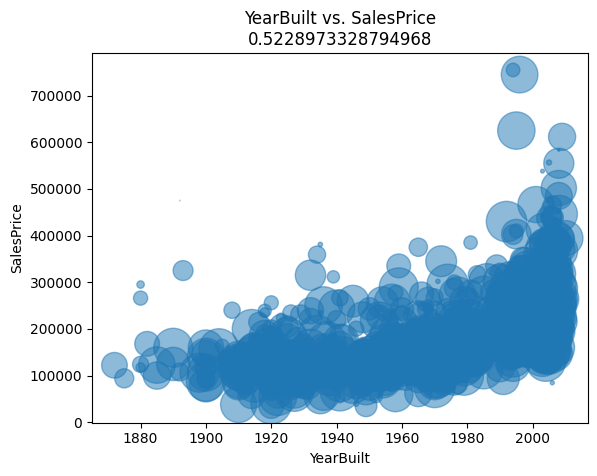

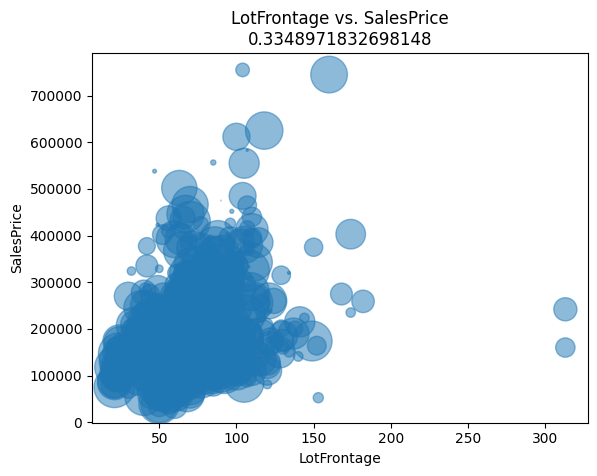

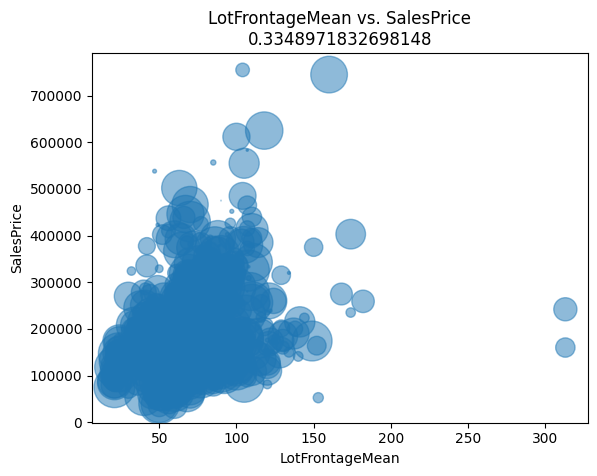

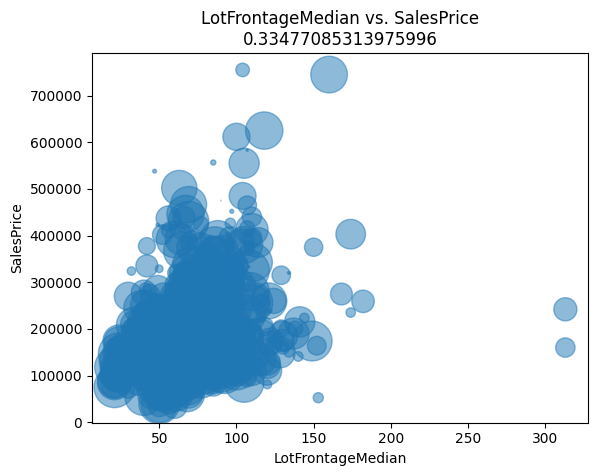

In [20]:
area = (30 * np.random.rand(1460))**2
for col in dataframe:
    if not (col == 'SalePrice'):
        plt.scatter(dataframe[col], dataframe['SalePrice'], s= area, alpha=0.5)
        plt.title(col + ' vs. SalesPrice' + '\n' + str(coeficientes[col][0]))
        plt.xlabel(col)
        plt.ylabel('SalesPrice')
        plt.show()

<Axes: >

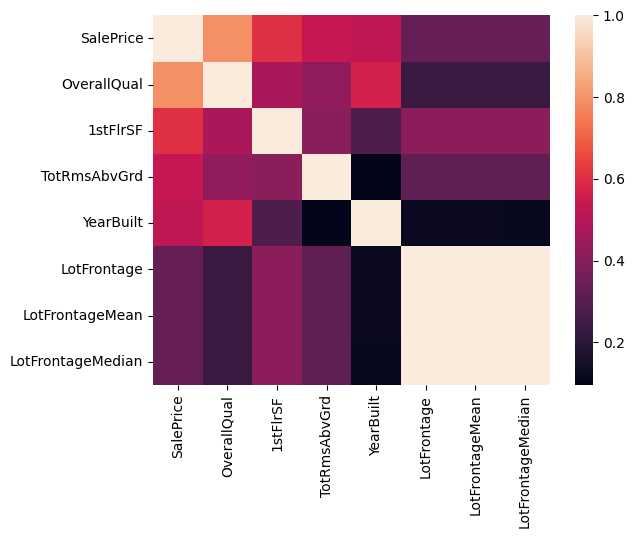

In [21]:
sns.heatmap(dataframe.corr())


## Variables que presentan mayor correlación

### Segun los gráficos de correlación y el coeficiente las variables con mayor correlación con la variable SalePrice son: OverallQual y TotRmsAbvGrd

# Función para entrenar un modelo de regresión lineal

In [126]:
def train(epochs, learning_rate, X, Y, imprimir_error_cada):
    dict = {}

    b1_b0 = [0, 0]
    errores = []

    for i in range(epochs):
        y_hat = np.dot(X, b1_b0)
        
        sumatoria = 0
        b0_gradiente = 0
        b1_gradiente = 0


        for j in range(len(Y)):
            #Calculo del error
            sumatoria += (Y[j] - y_hat[j])**2
            b1_gradiente += (y_hat[j] - Y[j])*X[j][0]
            b0_gradiente += (y_hat[j] - Y[j])            

            
        error = (1/(2*len(Y))) * sumatoria
        if ((i + 1) % imprimir_error_cada == 0):
            print(f'Iteración {i + 1} - Error {error}')

        errores.append(error)
        b0_gradiente = (1/len(Y)) * b0_gradiente
        b1_gradiente = (1/len(Y)) * b1_gradiente

        b1 = b1_b0[0] - (learning_rate * b1_gradiente)
        b0 = b1_b0[1] - (learning_rate * b0_gradiente)

        b1_b0 = [b1, b0] 

        dict[i] = y_hat

    return dict, errores, b1_b0


## Funcion para visualizar error

In [35]:
def graficoError(vector):
    x_axis = list(range(1, len(vector) + 1))
    y_axis = vector
    plt.plot(x_axis, y_axis)
    plt.title('Iteración vs. Error')
    plt.xlabel('Iteracion')
    plt.ylabel('error')
    plt.show()

## Función para visualizar evolución del modelo

In [77]:
def evolucionModelo(modelos, n, datos):
    i = n
    while(i <= len(modelos)): 
        x_axis = datos
        y_axis = modelos[i - 1]
        plt.plot(x_axis, y_axis)
        plt.scatter(datos, trainDataFrame['SalePrice'])
        plt.title('Iteración No.' + str(i))
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.show()
        
        i += n
        

## Importar sklearn

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Modelo 1 (OverallQual)

### Sklearn

In [91]:
X_train, X_test, y_train, y_test = train_test_split(dataframe['OverallQual'].values.reshape(-1,1), dataframe['SalePrice'], test_size=0.3, random_state=2023)

reg_model1=LinearRegression()
reg_model1.fit(X_train, y_train)
reg_model1


LinearRegression()

### Modelo nuestro

In [161]:
X1 = np.array([trainDataFrame['OverallQual'],np.ones(shape=len(trainDataFrame['OverallQual']))])
X1 = np.transpose(X1)
X1

modelos1,errores1,betas1 = train(5000, 0.03, X1, trainDataFrame['SalePrice'], 100)

Iteración 100 - Error 1333968438.7298496
Iteración 200 - Error 1287682612.7913702
Iteración 300 - Error 1252850153.678217
Iteración 400 - Error 1226636940.815123
Iteración 500 - Error 1206910153.0401351
Iteración 600 - Error 1192064732.9860716
Iteración 700 - Error 1180892792.6227703
Iteración 800 - Error 1172485334.2264025
Iteración 900 - Error 1166158290.3657968
Iteración 1000 - Error 1161396865.1970072
Iteración 1100 - Error 1157813648.431412
Iteración 1200 - Error 1155117093.9473853
Iteración 1300 - Error 1153087798.3281183
Iteración 1400 - Error 1151560649.2440646
Iteración 1500 - Error 1150411391.1947303
Iteración 1600 - Error 1149546515.5399795
Iteración 1700 - Error 1148895652.2298622
Iteración 1800 - Error 1148405844.190829
Iteración 1900 - Error 1148037238.5076203
Iteración 2000 - Error 1147759843.8165042
Iteración 2100 - Error 1147551090.077306
Iteración 2200 - Error 1147393992.1766448
Iteración 2300 - Error 1147275767.945132
Iteración 2400 - Error 1147186798.1444025
Iteraci

### Visualización del error

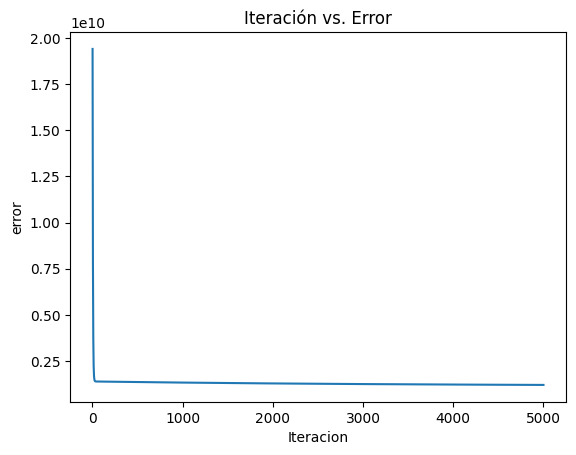

In [160]:
graficoError(errores1)

### Evolución de modelo

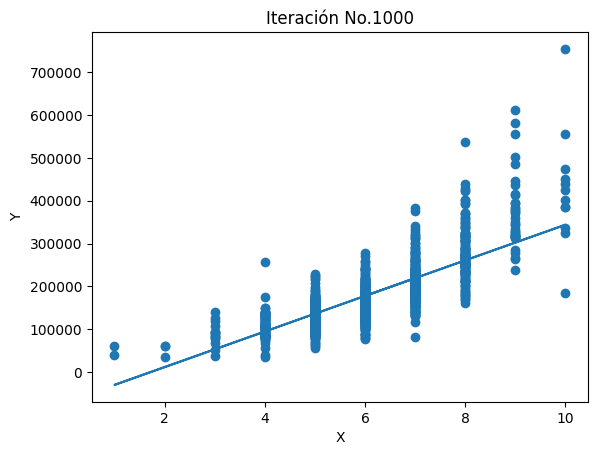

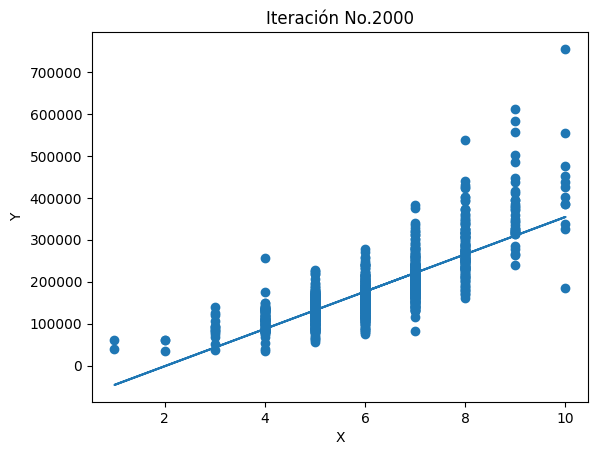

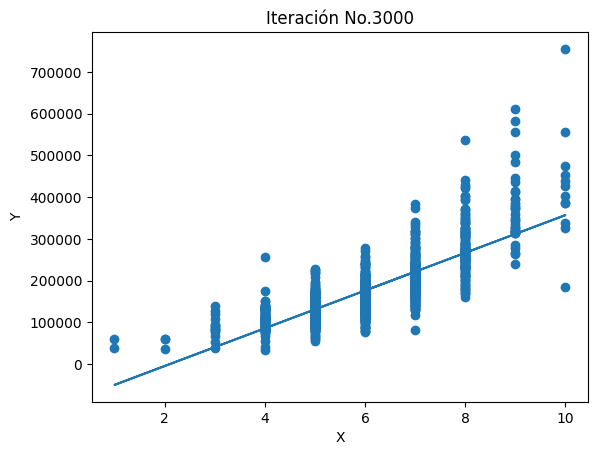

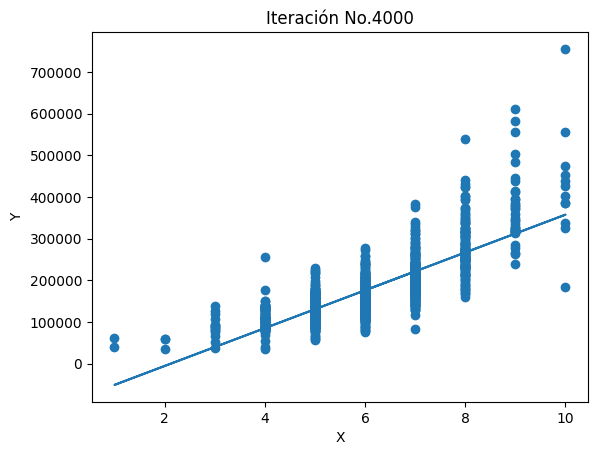

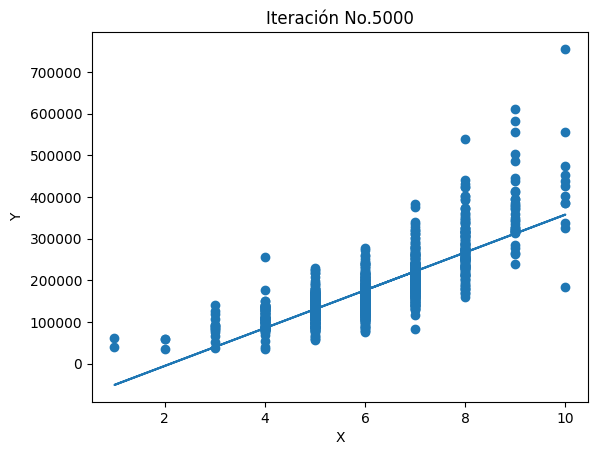

In [155]:
evolucionModelo(modelos1, 1000, trainDataFrame['OverallQual'])

## Modelo 2 (TotRmsAbvGrd)

### Sklearn

In [93]:
X_train, X_test, y_train, y_test = train_test_split(dataframe['TotRmsAbvGrd'].values.reshape(-1,1), dataframe['SalePrice'], test_size=0.3, random_state=2023)

reg_model2=LinearRegression()
reg_model2.fit(X_train, y_train)
reg_model2

LinearRegression()

### Modelo nuestro

In [156]:
X2 = np.array([trainDataFrame['TotRmsAbvGrd'],np.ones(shape=len(trainDataFrame['TotRmsAbvGrd']))])
X2 = np.transpose(X2)
X2

modelos2,errores2,betas2 = train(5000, 0.00003, X2, trainDataFrame['SalePrice'], 1000)


Iteración 1000 - Error 3236719697.6497226
Iteración 2000 - Error 2186587087.974823
Iteración 3000 - Error 2118599354.856335
Iteración 4000 - Error 2114197041.987671
Iteración 5000 - Error 2113911339.5376246


### Visualización del error

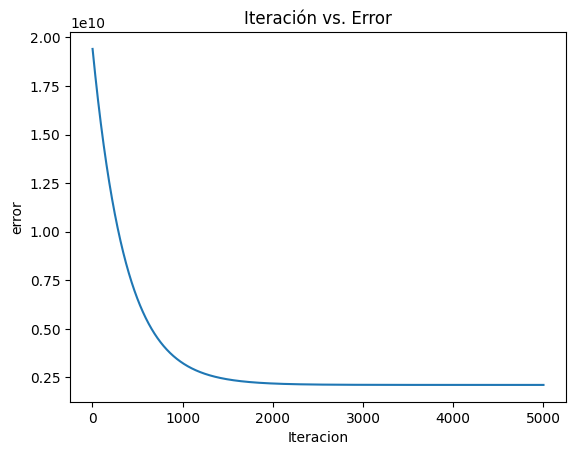

In [157]:
graficoError(errores2)

### Evolución del modelo

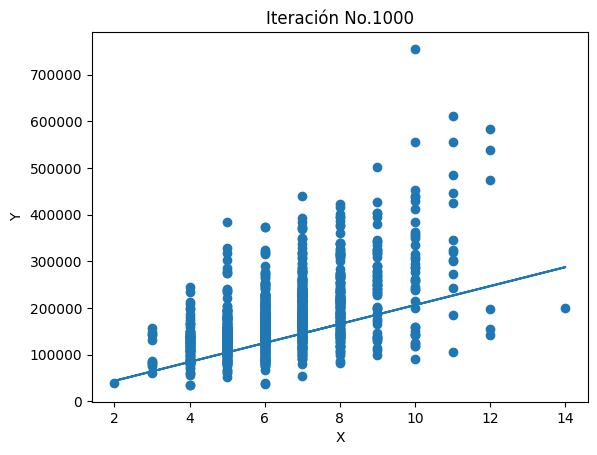

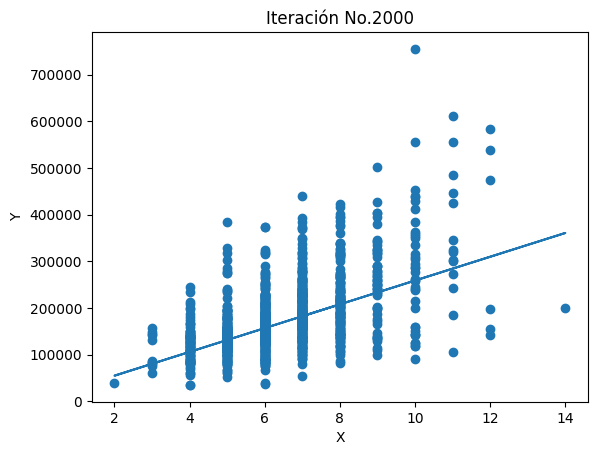

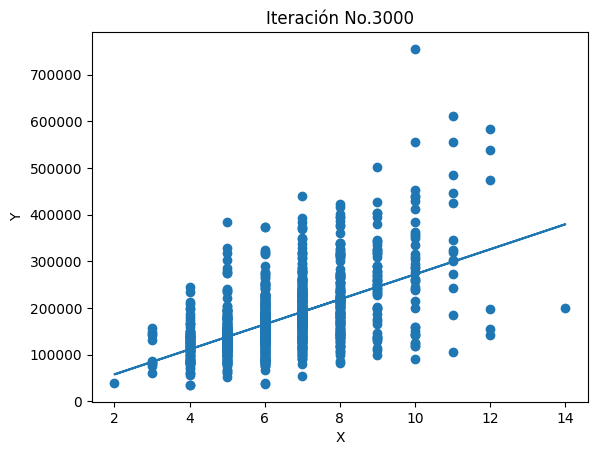

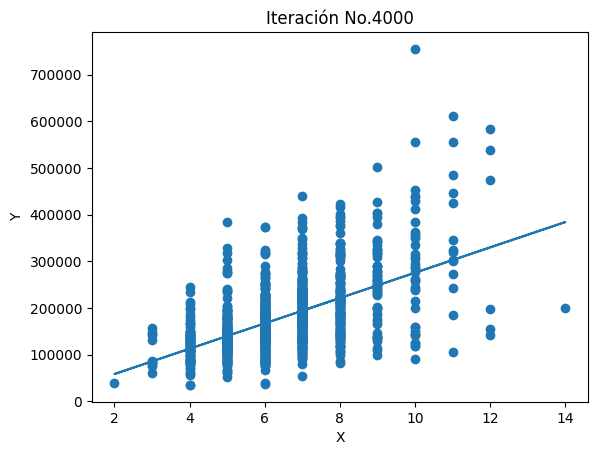

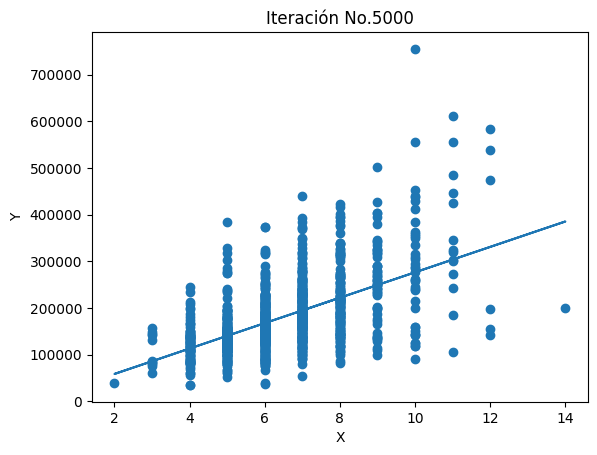

In [158]:
evolucionModelo(modelos2, 1000, trainDataFrame['TotRmsAbvGrd'])

## Funcion para predicciones

In [193]:
def predicciones(modeloManual, modeloscikit, vector):
    res_modeloManual = []
    res_modeloscikit = []
    promedio = []

    for n in range(len(vector)):
        pred_scikit = modeloscikit.intercept_ + (modeloscikit.coef_[0] * vector[n])
        pred_manual = modeloManual[1] + (modeloManual[0] * vector[n])

        res_modeloscikit.append(pred_scikit)
        res_modeloManual.append(pred_manual)
        promedio.append((pred_scikit + pred_manual) / 2)
    
    return res_modeloManual, res_modeloscikit, promedio



### Comparación de Primer modelo (OverallQual)

In [194]:
pManual1, pScikit1, promedio1 = predicciones(betas1,reg_model1, [testDataFrame['OverallQual'][0], testDataFrame['OverallQual'][1], testDataFrame['OverallQual'][2]])
print(f"Predicciones del modelo manual: {pManual1}")
print(f"Predicciones del modelo Scikit: {pScikit1}")
print(f"Promedio de las predicciones: {promedio1}")

Predicciones del modelo manual: [176007.6491541936, 357603.91613454407, 176007.6491541936]
Predicciones del modelo Scikit: [176225.73285617158, 356366.3908258842, 176225.73285617158]
Promedio de las predicciones: [176116.6910051826, 356985.1534802141, 176116.6910051826]


### Comparación de Segundo modelo (TotRmsAbvGrd)

In [168]:
pManual2, pScikit2, promedio2 = predicciones(betas2,reg_model2, [testDataFrame['TotRmsAbvGrd'][0], testDataFrame['TotRmsAbvGrd'][1], testDataFrame['TotRmsAbvGrd'][2]])
print(f"Predicciones del modelo manual: {pManual2}")
print(f"Predicciones del modelo Scikit: {pScikit2}")
print(f"Promedio de las predicciones: {promedio2}")

Predicciones del modelo manual: [194565.33852474764, 276263.24249865534, 167332.7038667784]
Predicciones del modelo Scikit: [192994.81043455595, 269737.4260004048, 167413.938579273]
Promedio de las predicciones: [193780.0744796518, 273000.3342495301, 167373.3212230257]


# Predicciones modelo 1 (OverallQual)

In [177]:
prediccionManual1,_,_ = predicciones(betas1, reg_model1, testDataFrame['OverallQual'])
print(f"Predicciones: {prediccionManual1}")

Predicciones: [176007.6491541936, 357603.91613454407, 176007.6491541936, 176007.6491541936, 221406.71589928123, 130608.58240910602, 176007.6491541936, 266805.7826443688, 130608.58240910602, 176007.6491541936, 130608.58240910602, 130608.58240910602, 221406.71589928123, 266805.7826443688, 357603.91613454407, 130608.58240910602, 130608.58240910602, 130608.58240910602, 39810.44891893078, 266805.7826443688, 221406.71589928123, 221406.71589928123, 85209.5156640184, 266805.7826443688, 130608.58240910602, 176007.6491541936, 176007.6491541936, 176007.6491541936, 221406.71589928123, 221406.71589928123, 221406.71589928123, 85209.5156640184, 85209.5156640184, 221406.71589928123, 130608.58240910602, 221406.71589928123, 130608.58240910602, 221406.71589928123, 85209.5156640184, 176007.6491541936, 130608.58240910602, 266805.7826443688, 176007.6491541936, 266805.7826443688, 85209.5156640184, 85209.5156640184, 130608.58240910602, 130608.58240910602, 176007.6491541936, 266805.7826443688, 85209.5156640184

## Calculo de error

In [178]:
errorModelo1 = abs(testDataFrame['SalePrice'] - prediccionManual1)
errorModelo1

0       58992.350846
1      267396.083865
2        5007.649154
3       13007.649154
4       49506.715899
           ...      
287      1007.649154
288     33992.350846
289     45093.284101
290     11516.417591
291     16891.417591
Name: SalePrice, Length: 292, dtype: float64

# Predicciones modelo 2 (TotRmsAbvGrd)

In [179]:
prediccionManual2,_,_ = predicciones(betas2, reg_model2, testDataFrame['TotRmsAbvGrd'])
print(f"Predicciones: {prediccionManual2}")

Predicciones: [194565.33852474764, 276263.24249865534, 167332.7038667784, 167332.7038667784, 140100.0692088092, 330728.51181459374, 249030.6078406861, 249030.6078406861, 140100.0692088092, 140100.0692088092, 194565.33852474764, 140100.0692088092, 221797.97318271687, 140100.0692088092, 276263.24249865534, 140100.0692088092, 140100.0692088092, 194565.33852474764, 194565.33852474764, 140100.0692088092, 194565.33852474764, 194565.33852474764, 194565.33852474764, 140100.0692088092, 167332.7038667784, 140100.0692088092, 194565.33852474764, 221797.97318271687, 249030.6078406861, 194565.33852474764, 167332.7038667784, 167332.7038667784, 140100.0692088092, 167332.7038667784, 140100.0692088092, 167332.7038667784, 167332.7038667784, 194565.33852474764, 140100.0692088092, 194565.33852474764, 167332.7038667784, 221797.97318271687, 221797.97318271687, 221797.97318271687, 112867.43455083997, 85634.79989287074, 167332.7038667784, 140100.0692088092, 221797.97318271687, 167332.7038667784, 85634.79989287

## Calculo de error

In [180]:
errorModelo2 = abs(testDataFrame['TotRmsAbvGrd'] - prediccionManual2)
errorModelo2

0      194558.338525
1      276253.242499
2      167326.703867
3      167326.703867
4      140095.069209
           ...      
287    194558.338525
288    194558.338525
289    249021.607841
290    140095.069209
291    167326.703867
Name: TotRmsAbvGrd, Length: 292, dtype: float64

# Gráficas de error para cada modelo

## Modelo 1

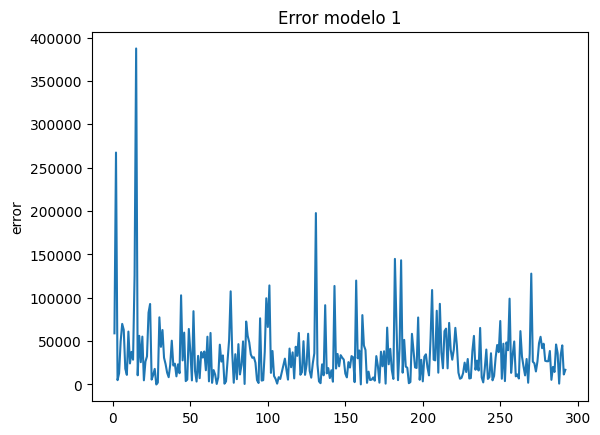

In [190]:
lista = list(range(1, len(errorModelo1) + 1))
plt.plot(lista, errorModelo1)
plt.title('Error modelo 1')
plt.ylabel('error')
plt.show()

## Modelo 2

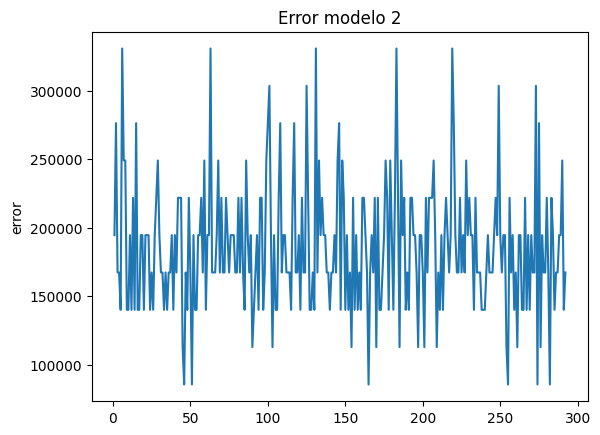

In [191]:
lista = list(range(1, len(errorModelo2) + 1))
plt.plot(lista, errorModelo2)
plt.title('Error modelo 2')
plt.ylabel('error')
plt.show()

## Medias de errores

In [192]:
print(f'Media de modelo 1: {np.mean(errorModelo1)}')
print(f'Media de modelo 2: {np.mean(errorModelo2)}')

Media de modelo 1: 34091.74603295695
Media de modelo 2: 184952.6591762174


# Conclusión de modelo con error más bajo

### Por la forma de la gráfica y por la media de los errores se puede determinar que el modelo 1 , es decir el modelo que utiliza la variable OverallQuality es mejor ya que su gráfico es más estable y su media es menor en comparación a la del modelo 2

# Enlace de video: https://drive.google.com/file/d/1XuOUtE4OfueXGz2EtFnqR2xMPTKY-Z3M/view?usp=sharing